# Scrapping

[Código usado para el scrapping](https://drive.google.com/file/d/1hZW-FQ5hQjYyG7-NgWsKiPOQn4nFbxbl/view?usp=sharing)

In [ ]:
#url_historical = 'https://www.losmundialesdefutbol.com/selecciones.php'

De aquí sacamos dos datasets, uno con la historia de: Partidos Jugados, Partidos ganados, Partidos Perdidos, Puntaje, clasificación. Para esto accedemos al accedo directo de `Mundial por Mundial` de `url_historical`.

Y otro Dataset con los enfrentamientos a lo largo de los mundiales. Para esto accedemos al acceso directo de `Resultados` de `url_historical`.

# Import Data and exploring


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_mundiales = pd.read_csv("drive/MyDrive/Sistemas_Biomecatronicos/Mundial/data_mundial/data - mundial a mundial.csv", parse_dates=['Mundial'])
df_mundiales['Mundial'] = df_mundiales['Mundial'].dt.year

df_resultados = pd.read_csv("drive/MyDrive/Sistemas_Biomecatronicos/Mundial/data_mundial/data - resultados.csv", parse_dates=['fecha'])
df_resultados['year'] = df_resultados['fecha'].dt.year

In [ ]:
df_mundiales.head(3)

,name_pais,Mundial,Selección,Posición,Etapa,PTS,PJ,PG,PE,PP,GF,GC,Dif
0,Alemania,1930,Alemania,0.0,no participó,0,0,0,0,0,0,0,0
1,Alemania,1934,Alemania,3.0,Partido 3er Puesto,6,4,3,0,1,11,8,3
2,Alemania,1938,Alemania,10.0,Octavos de Final,1,2,0,1,1,3,5,-2


In [ ]:
df_mundiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name_pais  1757 non-null   object 
 1   Mundial    1757 non-null   int64  
 2   Selección  1757 non-null   object 
 3   Posición   1755 non-null   float64
 4   Etapa      1757 non-null   object 
 5   PTS        1757 non-null   int64  
 6   PJ         1757 non-null   int64  
 7   PG         1757 non-null   int64  
 8   PE         1757 non-null   int64  
 9   PP         1757 non-null   int64  
 10  GF         1757 non-null   int64  
 11  GC         1757 non-null   int64  
 12  Dif        1757 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 178.6+ KB


In [ ]:
df_resultados.head(3)

,fecha,etapa,equipo_izq,goles_izq,equipo_der,goles_der,year
0,1934-05-27,Octavos,Alemania,5,Bélgica,2,1934
1,1934-05-31,Cuartos,Alemania,2,Suecia,1,1934
2,1934-06-03,Semis,Alemania,1,Checoslovaquia,3,1934


In [ ]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       1926 non-null   datetime64[ns]
 1   etapa       1926 non-null   object        
 2   equipo_izq  1926 non-null   object        
 3   goles_izq   1926 non-null   int64         
 4   equipo_der  1926 non-null   object        
 5   goles_der   1926 non-null   int64         
 6   year        1926 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 105.5+ KB


# Cleaning

In [ ]:
df_mundiales.loc[df_mundiales['Posición'].isna()]
# los null son justo lo resultados que tenemos que predecir
# pero esto no importa porque no tomamos en cuenta la data del 2022

,name_pais,Mundial,Selección,Posición,Etapa,PTS,PJ,PG,PE,PP,GF,GC,Dif
128,Argentina,2022,Argentina,NaN,Final,13,6,4,1,1,12,5,7
788,Francia,2022,Francia,NaN,Final,15,6,5,0,1,13,5,8


In [ ]:
# Le ponemos 2 solo para rellenar
df_mundiales.loc[df_mundiales['Posición'].isna(), "Posición"] = 2

df_mundiales.loc[df_mundiales['Posición'].isna()]

,name_pais,Mundial,Selección,Posición,Etapa,PTS,PJ,PG,PE,PP,GF,GC,Dif


# Generate Inputs

In [ ]:
df_resultados.loc[((df_resultados['equipo_izq']=='Alemania') & (df_resultados['equipo_der']=='Bélgica')) | ((df_resultados['equipo_izq']=='Bélgica') & (df_resultados['equipo_der']=='Alemania'))]

,fecha,etapa,equipo_izq,goles_izq,equipo_der,goles_der,year
0,1934-05-27,Octavos,Alemania,5,Bélgica,2,1934
71,1994-07-02,Octavos,Alemania,3,Bélgica,2,1994
291,1934-05-27,Octavos,Bélgica,2,Alemania,5,1934
317,1994-07-02,Octavos,Bélgica,2,Alemania,3,1994


In [ ]:
paises = df_mundiales['name_pais'].unique()
anios = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022]

In [ ]:
df_mundiales['name_pais'].unique()

array(['Alemania', 'Angola', 'Arabia', 'Argelia', 'Argentina',
       'Australia', 'Austria', 'Bélgica', 'Bolivia', 'Bosnia-Herzegovina',
       'Brasil', 'Bulgaria', 'Camerún', 'Canadá', 'Catar', 'Chile',
       'China', 'Colombia', 'Corea', 'Costa', 'Croacia', 'Cuba',
       'Dinamarca', 'Ecuador', 'Egipto', 'El', 'Emiratos', 'Escocia',
       'Eslovaquia', 'Eslovenia', 'España', 'Estados', 'Francia', 'Gales',
       'Ghana', 'Grecia', 'Haití', 'Holanda', 'Honduras', 'Hungría',
       'Indonesia', 'Inglaterra', 'Irán', 'Iraq', 'Irlanda', 'Islandia',
       'Israel', 'Italia', 'Jamaica', 'Japón', 'Kuwait', 'Marruecos',
       'México', 'Nigeria', 'Noruega', 'Nueva', 'Panamá', 'Paraguay',
       'Perú', 'Polonia', 'Portugal', 'RD', 'República', 'Rumania',
       'Rusia', 'Senegal', 'Serbia', 'Sudáfrica', 'Suecia', 'Suiza',
       'Togo', 'Trinidad', 'Túnez', 'Turquía', 'Ucrania', 'Uruguay'],
      dtype=object)

In [ ]:
print(len(anios), end='\n\n')

array_per_pais = []
for name_pais in paises:
    #pais = 'Alemania'
    df_pais = df_mundiales.loc[df_mundiales['name_pais']==name_pais].reset_index(drop=True)
    if df_pais.shape[0]>5:
        print(df_pais.shape)
        for i in range(len(anios)-5):
            print(i, name_pais)
            pais = df_pais.loc[i, "Selección"]
            year = anios[i+5]
            pos = df_pais.loc[i+5, 'Posición']
            if df_pais.loc[i+5, 'Etapa']=='no participó':
                pts, pj, pg, pe, pp = 0, 0, 0, 0, 0
            else:
                pts = df_pais.loc[i:i+4, 'PTS'].mean()
                pj = df_pais.loc[i:i+4, 'PJ'].mean()
                pg = df_pais.loc[i:i+4, 'PG'].mean()
                pe = df_pais.loc[i:i+4, 'PE'].mean()
                pp= df_pais.loc[i:i+4, 'PP'].mean()
            
            array_per_pais.append([year, pais, pos/5, pts/5, pj/5, pg/5, pe/5, pp/5])

array_per_pais = np.array(array_per_pais)

22

(41, 13)
0 Alemania
1 Alemania
2 Alemania
3 Alemania
4 Alemania
5 Alemania
6 Alemania
7 Alemania
8 Alemania
9 Alemania
10 Alemania
11 Alemania
12 Alemania
13 Alemania
14 Alemania
15 Alemania
16 Alemania
(22, 13)
0 Angola
1 Angola
2 Angola
3 Angola
4 Angola
5 Angola
6 Angola
7 Angola
8 Angola
9 Angola
10 Angola
11 Angola
12 Angola
13 Angola
14 Angola
15 Angola
16 Angola
(22, 13)
0 Arabia
1 Arabia
2 Arabia
3 Arabia
4 Arabia
5 Arabia
6 Arabia
7 Arabia
8 Arabia
9 Arabia
10 Arabia
11 Arabia
12 Arabia
13 Arabia
14 Arabia
15 Arabia
16 Arabia
(22, 13)
0 Argelia
1 Argelia
2 Argelia
3 Argelia
4 Argelia
5 Argelia
6 Argelia
7 Argelia
8 Argelia
9 Argelia
10 Argelia
11 Argelia
12 Argelia
13 Argelia
14 Argelia
15 Argelia
16 Argelia
(22, 13)
0 Argentina
1 Argentina
2 Argentina
3 Argentina
4 Argentina
5 Argentina
6 Argentina
7 Argentina
8 Argentina
9 Argentina
10 Argentina
11 Argentina
12 Argentina
13 Argentina
14 Argentina
15 Argentina
16 Argentina
(22, 13)
0 Australia
1 Australia
2 Australia
3 Au

In [ ]:
data_paises_izq = pd.DataFrame(array_per_pais, columns = ['year', 'equipo_izq', 'POS_izq', 'PTS_izq', 'PJ_izq', 'PG_izq', 'PE_izq', 'PP_izq'])
data_paises_izq["year"] = data_paises_izq["year"].astype("int64")
data_paises_izq["POS_izq"] = data_paises_izq["POS_izq"].astype("float64")
data_paises_izq["PTS_izq"] = data_paises_izq["PTS_izq"].astype("float64")
data_paises_izq["PJ_izq"] = data_paises_izq["PJ_izq"].astype("float64")
data_paises_izq["PG_izq"] = data_paises_izq["PG_izq"].astype("float64")
data_paises_izq["PE_izq"] = data_paises_izq["PE_izq"].astype("float64")
data_paises_izq["PP_izq"] = data_paises_izq["PP_izq"].astype("float64")

data_paises_der = pd.DataFrame(array_per_pais, columns = ['year', 'equipo_der', 'POS_der', 'PTS_der', 'PJ_der', 'PG_der', 'PE_der', 'PP_der'])
data_paises_der["year"] = data_paises_der["year"].astype("int64")
data_paises_der["POS_der"] = data_paises_der["POS_der"].astype("float64")
data_paises_der["PTS_der"] = data_paises_der["PTS_der"].astype("float64")
data_paises_der["PJ_der"] = data_paises_der["PJ_der"].astype("float64")
data_paises_der["PG_der"] = data_paises_der["PG_der"].astype("float64")
data_paises_der["PE_der"] = data_paises_der["PE_der"].astype("float64")
data_paises_der["PP_der"] = data_paises_der["PP_der"].astype("float64")

In [ ]:
data_paises_izq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1292 non-null   int64  
 1   equipo_izq  1292 non-null   object 
 2   POS_izq     1292 non-null   float64
 3   PTS_izq     1292 non-null   float64
 4   PJ_izq      1292 non-null   float64
 5   PG_izq      1292 non-null   float64
 6   PE_izq      1292 non-null   float64
 7   PP_izq      1292 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 80.9+ KB


In [ ]:
data_paises_der.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1292 non-null   int64  
 1   equipo_der  1292 non-null   object 
 2   POS_der     1292 non-null   float64
 3   PTS_der     1292 non-null   float64
 4   PJ_der      1292 non-null   float64
 5   PG_der      1292 non-null   float64
 6   PE_der      1292 non-null   float64
 7   PP_der      1292 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 80.9+ KB


In [ ]:
data_paises_der.loc[data_paises_der["PTS_der"]>1]

,year,equipo_der,POS_der,PTS_der,PJ_der,PG_der,PE_der,PP_der
3,1970,Alemania Occidental,0.6,1.20,0.88,0.52,0.16,0.20
4,1974,Alemania Occidental,0.2,1.60,1.12,0.72,0.16,0.24
5,1978,Alemania Occidental,1.2,1.68,1.16,0.76,0.16,0.24
6,1982,Alemania Occidental,0.4,1.68,1.16,0.72,0.24,0.20
7,1986,Alemania Occidental,0.4,1.80,1.28,0.76,0.28,0.24
...,...,...,...,...,...,...,...,...
899,2018,México,2.4,1.08,0.80,0.28,0.24,0.28
900,2022,México,4.4,1.12,0.80,0.32,0.16,0.32
1010,1986,Polonia,2.8,1.12,0.80,0.48,0.16,0.16
1036,2022,Portugal,1.6,1.20,0.84,0.32,0.24,0.28


In [ ]:
df_merged = df_resultados.iloc[:, 2:].merge(data_paises_izq, on=['year', 'equipo_izq'], how="inner")
df_merged = df_merged.merge(data_paises_der, on=['year', 'equipo_der'], how="inner")
df_merged

,equipo_izq,goles_izq,equipo_der,goles_der,year,POS_izq,PTS_izq,PJ_izq,PG_izq,PE_izq,PP_izq,POS_der,PTS_der,PJ_der,PG_der,PE_der,PP_der
0,Alemania Occidental,2,Marruecos,1,1970,0.6,1.20,0.88,0.52,0.16,0.20,2.8,0.00,0.00,0.00,0.00,0.00
1,Bulgaria,1,Marruecos,1,1970,2.6,0.04,0.24,0.00,0.04,0.20,2.8,0.00,0.00,0.00,0.00,0.00
2,Perú,3,Marruecos,0,1970,1.4,0.00,0.00,0.00,0.00,0.00,2.8,0.00,0.00,0.00,0.00,0.00
3,Alemania Occidental,5,Bulgaria,2,1970,0.6,1.20,0.88,0.52,0.16,0.20,2.6,0.04,0.24,0.00,0.04,0.20
4,Marruecos,1,Bulgaria,1,1970,2.8,0.00,0.00,0.00,0.00,0.00,2.6,0.04,0.24,0.00,0.04,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,Uruguay,2,Ghana,0,2022,4.0,1.24,0.76,0.36,0.16,0.24,4.8,0.60,0.48,0.16,0.12,0.20
1438,Checoslovaquia,6,Argentina,1,1958,1.8,0.36,0.36,0.16,0.04,0.16,2.6,0.32,0.24,0.16,0.00,0.08
1439,URSS,4,Colombia,4,1962,1.2,0.20,0.20,0.08,0.04,0.08,2.8,0.00,0.00,0.00,0.00,0.00
1440,Yugoslavia,5,Colombia,0,1962,0.8,0.44,0.40,0.16,0.12,0.12,2.8,0.00,0.00,0.00,0.00,0.00


# Neural Network

## Preparing Dataset

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
df_merged.loc[df_merged["goles_izq"] == df_merged["goles_der"], "resultado"] = 0
df_merged.loc[df_merged["goles_izq"] > df_merged["goles_der"], "resultado"] = 1
df_merged.loc[df_merged["goles_izq"] < df_merged["goles_der"], "resultado"] = 2

In [ ]:
labels = ["empate", "izq", "der"]
categorical_labels = to_categorical(df_merged["resultado"].tolist())
categorical_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
equipos = df_merged["equipo_izq"].unique().tolist()
numeric_labels = np.array(list(range(1, len(equipos)+1)))/len(equipos)
numeric_labels

array([0.01315789, 0.02631579, 0.03947368, 0.05263158, 0.06578947,
       0.07894737, 0.09210526, 0.10526316, 0.11842105, 0.13157895,
       0.14473684, 0.15789474, 0.17105263, 0.18421053, 0.19736842,
       0.21052632, 0.22368421, 0.23684211, 0.25      , 0.26315789,
       0.27631579, 0.28947368, 0.30263158, 0.31578947, 0.32894737,
       0.34210526, 0.35526316, 0.36842105, 0.38157895, 0.39473684,
       0.40789474, 0.42105263, 0.43421053, 0.44736842, 0.46052632,
       0.47368421, 0.48684211, 0.5       , 0.51315789, 0.52631579,
       0.53947368, 0.55263158, 0.56578947, 0.57894737, 0.59210526,
       0.60526316, 0.61842105, 0.63157895, 0.64473684, 0.65789474,
       0.67105263, 0.68421053, 0.69736842, 0.71052632, 0.72368421,
       0.73684211, 0.75      , 0.76315789, 0.77631579, 0.78947368,
       0.80263158, 0.81578947, 0.82894737, 0.84210526, 0.85526316,
       0.86842105, 0.88157895, 0.89473684, 0.90789474, 0.92105263,
       0.93421053, 0.94736842, 0.96052632, 0.97368421, 0.98684

In [ ]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_merged.loc[:, 'POS_izq'] = minmax_norm(df_merged['POS_izq'])
df_merged.loc[:, 'PTS_izq'] = minmax_norm(df_merged['PTS_izq'])
df_merged.loc[:, 'PJ_izq'] = minmax_norm(df_merged['PJ_izq'])
df_merged.loc[:, 'PG_izq'] = minmax_norm(df_merged['PG_izq'])
df_merged.loc[:, 'PE_izq'] = minmax_norm(df_merged['PE_izq'])
df_merged.loc[:, 'PP_izq'] = minmax_norm(df_merged['PP_izq'])
df_merged.loc[:, 'POS_der'] = minmax_norm(df_merged['POS_der'])
df_merged.loc[:, 'PTS_der'] = minmax_norm(df_merged['PTS_der'])
df_merged.loc[:, 'PJ_der'] = minmax_norm(df_merged['PJ_der'])
df_merged.loc[:, 'PG_der'] = minmax_norm(df_merged['PG_der'])
df_merged.loc[:, 'PE_der'] = minmax_norm(df_merged['PE_der'])
df_merged.loc[:, 'PP_der'] = minmax_norm(df_merged['PP_der'])

df_merged.head()

,equipo_izq,goles_izq,equipo_der,goles_der,year,POS_izq,PTS_izq,PJ_izq,PG_izq,PE_izq,PP_izq,POS_der,PTS_der,PJ_der,PG_der,PE_der,PP_der,resultado
0,Alemania Occidental,2,Marruecos,1,1970,0.064516,0.394737,0.666667,0.541667,0.4,0.416667,0.419355,0.000000,0.000000,0.0,0.0,0.000000,1.0
1,Bulgaria,1,Marruecos,1,1970,0.387097,0.013158,0.181818,0.000000,0.1,0.416667,0.419355,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,Perú,3,Marruecos,0,1970,0.193548,0.000000,0.000000,0.000000,0.0,0.000000,0.419355,0.000000,0.000000,0.0,0.0,0.000000,1.0
3,Alemania Occidental,5,Bulgaria,2,1970,0.064516,0.394737,0.666667,0.541667,0.4,0.416667,0.387097,0.013158,0.181818,0.0,0.1,0.416667,1.0
4,Marruecos,1,Bulgaria,1,1970,0.419355,0.000000,0.000000,0.000000,0.0,0.000000,0.387097,0.013158,0.181818,0.0,0.1,0.416667,0.0


In [ ]:
def get_value_equipo(str_equipo):
    return numeric_labels[equipos.index(str_equipo)]
    #return equipos[label.tolist().index(1)]

In [ ]:
df = df_merged.loc[:, ['year', 'equipo_izq', 'equipo_der', 'POS_izq', 'PTS_izq', 'PJ_izq', 'PG_izq', 'PE_izq', 'PP_izq', 'POS_der', 'PTS_der', 'PJ_der', 'PG_der', 'PE_der', 'PP_der']]

In [ ]:
for equipo in equipos:
    df.loc[df_merged["equipo_izq"]==equipo, "equipo_izq"] = get_value_equipo(equipo)
    df.loc[df_merged["equipo_der"]==equipo, "equipo_der"] = get_value_equipo(equipo)
df.head()

,year,equipo_izq,equipo_der,POS_izq,PTS_izq,PJ_izq,PG_izq,PE_izq,PP_izq,POS_der,PTS_der,PJ_der,PG_der,PE_der,PP_der
0,1970,0.013158,0.052632,0.064516,0.394737,0.666667,0.541667,0.4,0.416667,0.419355,0.000000,0.000000,0.0,0.0,0.000000
1,1970,0.026316,0.052632,0.387097,0.013158,0.181818,0.000000,0.1,0.416667,0.419355,0.000000,0.000000,0.0,0.0,0.000000
2,1970,0.039474,0.052632,0.193548,0.000000,0.000000,0.000000,0.0,0.000000,0.419355,0.000000,0.000000,0.0,0.0,0.000000
3,1970,0.013158,0.026316,0.064516,0.394737,0.666667,0.541667,0.4,0.416667,0.387097,0.013158,0.181818,0.0,0.1,0.416667
4,1970,0.052632,0.026316,0.419355,0.000000,0.000000,0.000000,0.0,0.000000,0.387097,0.013158,0.181818,0.0,0.1,0.416667


In [ ]:
df.columns

Index(['year', 'equipo_izq', 'equipo_der', 'POS_izq', 'PTS_izq', 'PJ_izq',
       'PG_izq', 'PE_izq', 'PP_izq', 'POS_der', 'PTS_der', 'PJ_der', 'PG_der',
       'PE_der', 'PP_der'],
      dtype='object')

In [ ]:
def generate_match(year, eq_izq, eq_der):
    value_eq1 = get_value_equipo(eq_izq)
    value_eq2 = get_value_equipo(eq_der)

    data_eq1 = df.loc[(df["year"]==2022) & (df["equipo_izq"]==value_eq1)].iloc[0, 3:9].to_numpy().tolist()
    data_eq2 = df.loc[(df["year"]==2022) & (df["equipo_izq"]==value_eq2)].iloc[0, 3:9].to_numpy().tolist()

    return np.array([value_eq1]+[value_eq2]+data_eq1+data_eq2)

## Parting Dataset

In [ ]:
def get_train_test_data(data, labels, percent_train=0.8):
    indices = []
    for i in range(data.shape[0]):
        indice = np.random.choice(data.shape[0])
        while(indice in indices):
            indice = np.random.choice(data.shape[0])
        indices.append(indice)

    index = int(df.shape[0]*0.8)
    train_indices = indices[:index]
    test_indices = indices[index:]

    train_data = data.loc[train_indices, :].to_numpy().tolist()
    train_data = np.array([np.array(lista) for lista in train_data])
    train_labels = labels[train_indices]

    test_data = data.loc[test_indices, :].to_numpy().tolist()
    test_data = np.array([np.array(lista) for lista in test_data])
    test_labels = labels[test_indices]

    return (train_data, train_labels), (test_data, test_labels)


In [ ]:
(train_data, train_labels), (test_data, test_labels) = get_train_test_data(data = df.iloc[:, 1:], labels = categorical_labels, percent_train=0.8)

In [ ]:
print("shape train -> ", len(train_data))
print("shape test  -> ", len(test_data))

shape train ->  1153
shape test  ->  289


## Doing model

In [ ]:
import tensorflow as tf
import keras
from keras import layers, models
from tensorflow.keras import optimizers

In [ ]:
# Creando el modelo

model1= models.Sequential() #Agregamos el modelo 1

dropout_rate = 0.3

model1.add(layers.Dense(14, activation="relu", input_shape=(14,)))
model1.add(layers.Dense(28, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(56, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(56, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(112, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(112, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(56, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(56, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(28, activation="relu"))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Dense(3, activation="softmax"))#capa de salida


In [ ]:
#Resumen de nuestra red 1
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 28)                420       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_2 (Dense)             (None, 56)                1624      
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense_3 (Dense)             (None, 56)                3192      
                                                                 
 dropout_2 (Dropout)         (None, 56)                0

In [ ]:
#Parámetros de entrenamiento

learning_rate1 = 0.03
model1.compile(optimizer=optimizers.SGD(learning_rate1),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
#Entrenamiento
#Considerar validation_split=0.3
epochs = 60
historial1 = model1.fit(train_data, 
                        train_labels, 
                        validation_split=0.3,
                        epochs=epochs,
                        batch_size=50)

Epoch 1/60
17/17 [==============================] - 3s 49ms/step - loss: 1.0973 - accuracy: 0.3420 - val_loss: 1.0917 - val_accuracy: 0.3584
Epoch 2/60
17/17 [==============================] - 0s 12ms/step - loss: 1.0914 - accuracy: 0.3519 - val_loss: 1.0866 - val_accuracy: 0.3757
Epoch 3/60
17/17 [==============================] - 0s 15ms/step - loss: 1.0901 - accuracy: 0.3457 - val_loss: 1.0850 - val_accuracy: 0.3757
Epoch 4/60
17/17 [==============================] - 0s 16ms/step - loss: 1.0884 - accuracy: 0.3581 - val_loss: 1.0833 - val_accuracy: 0.3757
Epoch 5/60
17/17 [==============================] - 0s 12ms/step - loss: 1.0859 - accuracy: 0.3544 - val_loss: 1.0822 - val_accuracy: 0.3757
Epoch 6/60
17/17 [==============================] - 0s 15ms/step - loss: 1.0865 - accuracy: 0.3507 - val_loss: 1.0807 - val_accuracy: 0.3757
Epoch 7/60
17/17 [==============================] - 0s 16ms/step - loss: 1.0855 - accuracy: 0.3606 - val_loss: 1.0804 - val_accuracy: 0.3757
Epoch 8/60
17

10/10 [==============================] - 0s 2ms/step - loss: 0.8949 - accuracy: 0.6747


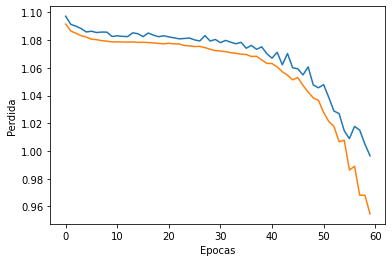

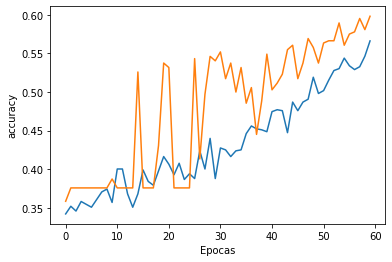

In [ ]:
import matplotlib.pyplot as plt

#Evaluacion del modelo 1

model1.evaluate(test_data,
                test_labels)

plt.xlabel("Epocas")
plt.ylabel("Perdida")
plt.plot(historial1.history['loss'], label="loss")
plt.plot(historial1.history['val_loss'], label="val_loss")
plt.show()

plt.xlabel("Epocas")
plt.ylabel("accuracy")
plt.plot(historial1.history['accuracy'], label="accuracy")
plt.plot(historial1.history['val_accuracy'], label="val_accuracy")
plt.show()

## Prediction

In [ ]:
equipo1 = "Francia"
equipo2 = "Argentina"

partido = generate_match(year=2022, eq_izq="Francia", eq_der="Argentina")
prediccion = model1.predict(np.array([partido]))


1/1 [==============================] - 0s 159ms/step


In [ ]:
quien_gana = labels[np.argmax(prediccion[0])]
if quien_gana=="izq":
    print("Ganó: ", equipo1)
elif quien_gana=="der":
    print("Ganó: ", equipo2)
elif quien_gana=="empate":
    print("Partido EMPATADO") # Se define en tiempos extras
else:
    print("somthing where wrong")


Ganó:  Argentina
